In [2]:
import ROOT as r
import math
import array
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import pandas as pd

#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________
import ERROR
import CONFIG
import DBPARSE
from PXPY import *
from ASYMMETRY import *
from UTILITIES import *
from SIMFITS import DistributionFits
from ROOT import gStyle, TChain, TH1F, TCanvas, TLegend
import CORRECTIONS
import CALCULATE
import GETFF
from joblib import Parallel, delayed
import importlib
#importlib.reload(ASYMMETRY)

Welcome to JupyROOT 6.26/06


In [3]:
def torr_to_atm(torr):
    return torr / 760.0


In [4]:
Hunter=torr_to_atm(90.8)/7.9
Windmill=torr_to_atm(90.7)/7.55
Fringe=torr_to_atm(90.1)/7.25
Chicago=torr_to_atm(91.3)/7.44
Donya=torr_to_atm(92.7)/7.43
Christin=torr_to_atm(89.8)/7.38

kin2=Hunter
kin3=(Hunter+Windmill)/2
kin4=(Fringe+Chicago+Donya+Christin)/4

print(kin2,kin3,kin4)

0.015123251165889407 0.015465076262624035 0.016231434243619784


In [5]:

simconfig="2"
genericSim=np.load(f"/media/research/TOSHIBA EXT/GEn/NumpySim/GEN{simconfig}/simulation0.npz")
genericSimN2=np.load(f"/media/research/TOSHIBA EXT/GEn/NumpySim/GEN{simconfig}/simulationN20.npz")




protoncut=genericSim["fnucl"]==1
neutroncut=genericSim["fnucl"]==0
protoncutN2=genericSimN2["fnucl"]==1
neutroncutN2=genericSimN2["fnucl"]==0
weight=genericSim["weight"]
weightN2=genericSimN2["weight"]


total_weight = np.sum(weight)

region_weight = np.sum(weight[(neutroncut) & (np.abs(genericSim["dx"]) < 0.5)])
he3neutrons=region_weight
ratio3He = region_weight / total_weight
print(f"Fraction of weights in |dx| < 0.5 region - 3He: {ratio3He:.4f}")

total_weight = np.sum(weightN2)

region_weight = np.sum(weightN2[(neutroncutN2) & (np.abs(genericSimN2["dx"]) < 0.5)])
n2neutrons=region_weight

ratioN2 = region_weight / total_weight
print(f"Fraction of weights in |dx| < 0.5 region - N2: {ratioN2:.4f}")


print(ratioN2/ratio3He/14)
print("fN2",14*kin2/(14*kin2+(1-kin2))*n2neutrons/he3neutrons/14)



Fraction of weights in |dx| < 0.5 region - 3He: 0.1496
Fraction of weights in |dx| < 0.5 region - N2: 0.3165
0.15117995979395407
fN2 0.01394231649934707


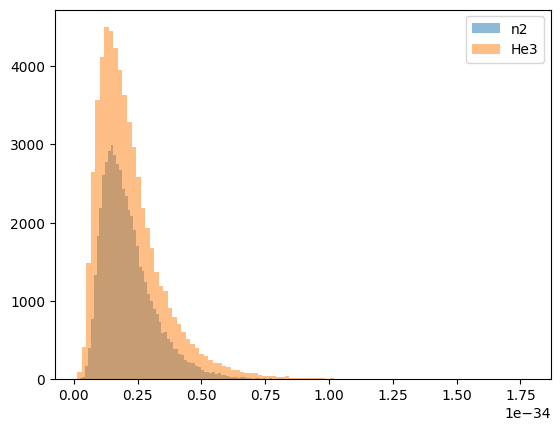

In [5]:
d=plt.hist(weightN2[neutroncutN2],bins=100,alpha=.5,label="n2")
d=plt.hist(weight[neutroncut],bins=100,alpha=.5,label="He3")
plt.legend(loc='upper right')

In [6]:
n2neutrons/he3neutrons/14


0.0787973400392614

Text(0.5, 1.0, '3He GEN2')

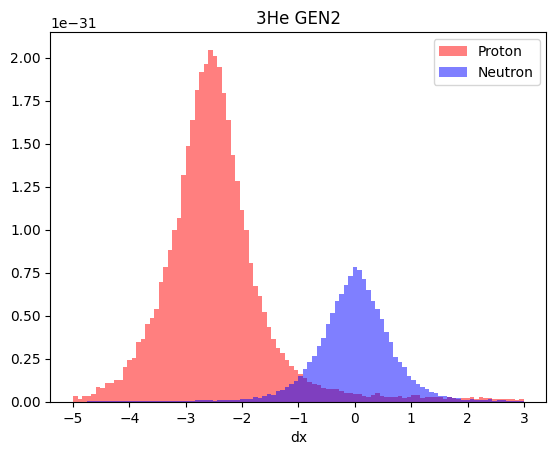

In [11]:
d=plt.hist(genericSim["dx"][protoncut],bins=100,range=(-5,3),
           color='red',alpha=.5,weights=weight[protoncut],label="Proton")
d=plt.hist(genericSim["dx"][neutroncut],bins=100,range=(-5,3),
           color='blue',alpha=.5,weights=weight[neutroncut],label="Neutron")
plt.legend(loc='upper right')
plt.xlabel("dx")
plt.title("3He GEN2")


Text(0.5, 1.0, 'N2 GEN2')

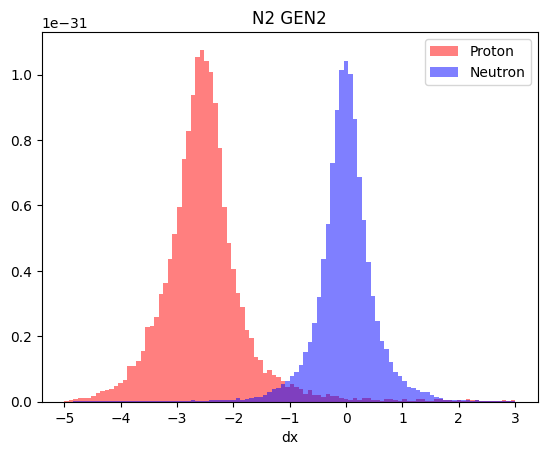

In [12]:
d=plt.hist(genericSimN2["dx"][protoncutN2],bins=100,range=(-5,3),
           color='red',alpha=.5,weights=weightN2[protoncutN2],label="Proton")
d=plt.hist(genericSimN2["dx"][neutroncutN2],bins=100,range=(-5,3),
           color='blue',alpha=.5,weights=weightN2[neutroncutN2],label="Neutron")
plt.xlabel("dx")
plt.legend(loc='upper right')

plt.title("N2 GEN2")

In [9]:

simconfig="3"
genericSim=np.load(f"/media/research/TOSHIBA EXT/GEn/NumpySim/GEN{simconfig}/simulation0.npz")
genericSimN2=np.load(f"/media/research/TOSHIBA EXT/GEn/NumpySim/GEN{simconfig}/simulationN20.npz")




protoncut=genericSim["fnucl"]==1
neutroncut=genericSim["fnucl"]==0
protoncutN2=genericSimN2["fnucl"]==1
neutroncutN2=genericSimN2["fnucl"]==0
weight=genericSim["weight"]
weightN2=genericSimN2["weight"]


total_weight = np.sum(weight)

region_weight = np.sum(weight[(neutroncut) & (np.abs(genericSim["dx"]) < 0.5)])

ratio3He = region_weight / total_weight
print(f"Fraction of weights in |dx| < 0.5 region - 3He: {ratio3He:.4f}")

total_weight = np.sum(weightN2)

region_weight = np.sum(weightN2[(neutroncutN2) & (np.abs(genericSimN2["dx"]) < 0.5)])

ratioN2 = region_weight / total_weight
print(f"Fraction of weights in |dx| < 0.5 region - N2: {ratioN2:.4f}")


print(ratioN2/ratio3He/14)
print(n2neutrons/he3neutrons/14)
print("fN2",14*kin3/(14*kin3+(1-kin3))*ratioN2/ratio3He/14)
print("fN2",14*kin3/(14*kin3+(1-kin3))*n2neutrons/he3neutrons/14)



Fraction of weights in |dx| < 0.5 region - 3He: 0.1571
Fraction of weights in |dx| < 0.5 region - N2: 0.2975
0.13525806604862672
0.0787973400392614
fN2 0.024382803407552025
fN2 0.01420469852440896


In [10]:

simconfig="4"
genericSim=np.load(f"/media/research/TOSHIBA EXT/GEn/NumpySim/GEN{simconfig}/simulation0.npz")
genericSimN2=np.load(f"/media/research/TOSHIBA EXT/GEn/NumpySim/GEN{simconfig}/simulationN20.npz")




protoncut=genericSim["fnucl"]==1
neutroncut=genericSim["fnucl"]==0
protoncutN2=genericSimN2["fnucl"]==1
neutroncutN2=genericSimN2["fnucl"]==0
weight=genericSim["weight"]
weightN2=genericSimN2["weight"]


total_weight = np.sum(weight)

region_weight = np.sum(weight[(neutroncut) & (np.abs(genericSim["dx"]) < 0.5)])
he3neutrons=region_weight


ratio3He = region_weight / total_weight
print(f"Fraction of weights in |dx| < 0.5 region - 3He: {ratio3He:.4f}")

total_weight = np.sum(weightN2)

region_weight = np.sum(weightN2[(neutroncutN2) & (np.abs(genericSimN2["dx"]) < 0.5)])
n2neutrons=region_weight

ratioN2 = region_weight / total_weight
print(f"Fraction of weights in |dx| < 0.5 region - N2: {ratioN2:.4f}")


print(ratioN2/ratio3He/14)
print("fN2",14*kin4/(14*kin4+(1-kin4))*ratioN2/ratio3He/14)



Fraction of weights in |dx| < 0.5 region - 3He: 0.1562
Fraction of weights in |dx| < 0.5 region - N2: 0.2892
0.13225524051119633
fN2 0.024817074160603175


In [11]:
Hunter=torr_to_atm(90.8)/7.9
Windmill=torr_to_atm(90.7)/7.55
Fringe=torr_to_atm(90.1)/7.25
Chicago=torr_to_atm(91.3)/7.44
Donya=torr_to_atm(92.7)/7.43
Christin=torr_to_atm(89.8)/7.38

kin2=Hunter
kin3=(Hunter+Windmill)/2
kin4=(Fringe+Chicago+Donya+Christin)/4

print(kin2,kin3,kin4)

0.015123251165889407 0.015465076262624035 0.016231434243619784
